In [1]:
import time
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import export_text

In [3]:
data=pd.read_csv("/content/pheno_train.csv")
data

,Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
0,814,51131,815,51131,NYU,NYU_0051131,2,19.7300,1,NaN,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
1,162,50237,163,50237,TRINITY,Trinity_0050237,1,21.4200,1,R,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
2,863,51185,864,51185,STANFORD,Stanford_0051185,2,8.2464,1,R,...,NaN,maybe,skull-striping fail;,OK,NaN,OK,NaN,OK,NaN,1
3,668,50978,669,50978,NYU,NYU_0050978,1,9.5800,1,NaN,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
4,508,50653,509,50653,CMU,CMU_a_0050653,1,30.0000,1,R,...,ventral edge is cropped,OK,NaN,fail,ic-frontal-temporal-cerebellum,OK,NaN,OK,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,1068,51482,1069,51482,CALTECH,Caltech_0051482,2,21.1000,2,R,...,NaN,OK,NaN,maybe,Ic-parietal-minor,OK,NaN,OK,NaN,0
927,201,50278,202,50278,UM_1,UM_1_0050278,1,11.3000,2,R,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
928,385,50477,386,50477,USM,USM_0050477,1,20.1807,1,NaN,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
929,655,50965,656,50965,NYU,NYU_0050965,1,9.2500,1,NaN,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1


In [4]:
data=data.fillna(1)

In [5]:
data=pd.get_dummies(data)

In [6]:
inputs = data.drop('SUB_IN_SMP', axis=1)
outputs = data['SUB_IN_SMP']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(inputs,outputs, test_size=0.5, random_state=0)

In [8]:
print("x_train\n",X_train)
print("y_train\n",y_train)
print("x_test\n",X_test)
print("y_test\n",y_test)

x_train
      Unnamed: 0  SUB_ID    X  subject  DX_GROUP  AGE_AT_SCAN  SEX  \
0           814   51131  815    51131         2      19.7300    1   
46          865   51187  866    51187         2       8.3313    1   
171           2   50004    3    50004         1      19.0900    1   
392         248   50325  249    50325         1      13.1000    1   
745         725   51040  726    51040         2       8.5200    2   
..          ...     ...  ...      ...       ...          ...  ...   
835         611   50795  612    50795         1       8.0900    2   
192         130   50191  131    50191         1      12.6300    1   
629         129   50190  130    50190         1      13.9900    1   
559         505   50650  506    50650         1      31.0000    2   
684          93   50142   94    50142         1      13.9900    1   

     HANDEDNESS_SCORES    FIQ    VIQ  ...  qc_anat_notes_rater_3_half head  \
0                 68.0  119.0  112.0  ...                                0   
46    

In [9]:
start_time=time.time()
clf = DecisionTreeClassifier(random_state=0,max_depth=2)
clf.fit(X_train,y_train)
end_time=time.time()
print("the time taken for the model is:",end_time-start_time)

the time taken for the model is: 0.03586149215698242


In [10]:
y_pred=clf.predict(X_test)

[Text(0.6, 0.8333333333333334, 'x[6] <= 1.5\ngini = 0.44\nsamples = 465\nvalue = [152, 313]'),
 Text(0.4, 0.5, 'x[0] <= 1039.5\ngini = 0.331\nsamples = 396\nvalue = [83, 313]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.257\nsamples = 369\nvalue = [56, 313]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 69\nvalue = [69, 0]')]

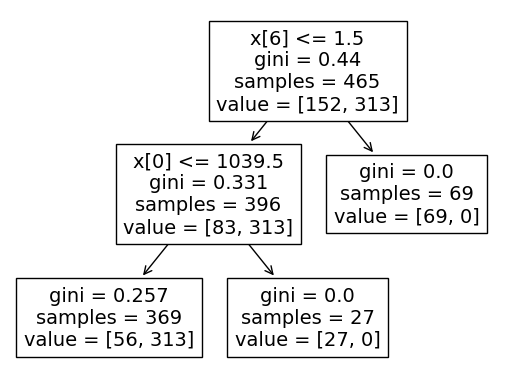

In [11]:
plot_tree(clf)

In [12]:
print(clf.score(X_train,y_train)*100)

87.95698924731182


In [13]:
from sklearn.metrics import confusion_matrix,classification_report
a=confusion_matrix(y_test,y_pred)
b=classification_report(y_test,y_pred)
print(a)
print(b)

[[ 98  44]
 [  2 322]]
              precision    recall  f1-score   support

           0       0.98      0.69      0.81       142
           1       0.88      0.99      0.93       324

    accuracy                           0.90       466
   macro avg       0.93      0.84      0.87       466
weighted avg       0.91      0.90      0.90       466

